In [1]:
import ast
import pandas as pd
import sys
import matplotlib.pylab as plt
import operator
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pyfpgrowth
import timeit

In [7]:
uid_songid_file_location = './Dataset/filtered_uid_songid_dataset_freq_11_to_5000_with_HML.txt'

In [23]:
uid_songid_file = open(uid_songid_file_location)
uid_songid_file_data = []
for line in uid_songid_file:
    to_be_appended = line.strip().replace('[','').replace(']','').replace('"','').replace("'",'').strip().replace(' ','').split(',')
    uid_songid_file_data.append(to_be_appended)

uid_songid_file.close()
uid_songid_file_data[0]

['58821L', '351764L']

In [24]:
uid_songid_transaction_data = uid_songid_file_data
len(uid_songid_transaction_data)

110000

In [25]:
patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, 4)
len(patterns)

171961

In [26]:
sorted_patterns = sorted(patterns.items(), key=operator.itemgetter(1),reverse=True)
(sorted_patterns[100][0])

('25903L',)

In [27]:
calculate_length_itemsets_dict = {}
for itemset in sorted_patterns:
    itemset_len = len(itemset[0])
    if itemset_len in calculate_length_itemsets_dict:
        calculate_length_itemsets_dict[itemset_len] += 1
    else:
        calculate_length_itemsets_dict[itemset_len] = 1

In [28]:
calculate_length_itemsets_dict

{1: 42862, 2: 77792, 3: 34934, 4: 13444, 5: 2690, 6: 229, 7: 10}

In [29]:
def get_length_itemsets_dict(uid_songid_transaction_data,min_sup):
    
    patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, min_sup)
    sorted_patterns = sorted(patterns.items(), key=operator.itemgetter(1),reverse=True)
    calculate_length_itemsets_dict = {}
    for itemset in sorted_patterns:
        itemset_len = len(itemset[0])
        if itemset_len in calculate_length_itemsets_dict:
            calculate_length_itemsets_dict[itemset_len] += 1
        else:
            calculate_length_itemsets_dict[itemset_len] = 1
        
    return calculate_length_itemsets_dict

In [30]:
itemset_lengths_list = []
itemset_frequency = []
for key,value in calculate_length_itemsets_dict.items():
    itemset_lengths_list.append(key)
    itemset_frequency.append(value)

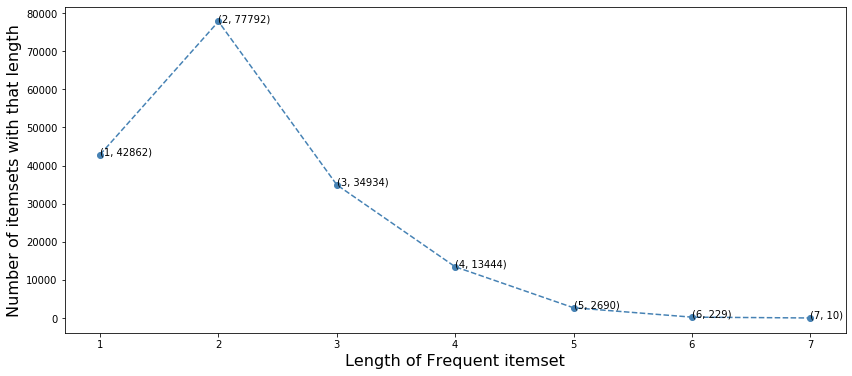

In [31]:
#Plot number of itemsets with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(itemset_lengths_list, itemset_frequency, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Length of Frequent itemset", fontsize=16)
ax.set_ylabel("Number of itemsets with that length", fontsize=16)
for i in range(0,len(itemset_frequency)):
    plt.text(itemset_lengths_list[i], itemset_frequency[i],'({}, {})'.format(itemset_lengths_list[i], itemset_frequency[i]))
plt.show()

In [32]:
#Run FP and generate association rules for various different values of MIN_SUP

min_sup_array = [3,4,5,6,7,8,9,10]
OVERALL_itemset_frequency_array = []
OVERALL_length_itemset_array = []

for i in range(len(min_sup_array)):
    MIN_SUP = min_sup_array[i]
    print("Calculating for MIN_SUP = " + str(MIN_SUP))
    itemset_lengths_list = []
    itemset_frequency = []
    calculate_length_itemsets_dict = get_length_itemsets_dict(uid_songid_transaction_data,MIN_SUP)
    for key,value in calculate_length_itemsets_dict.items():
        itemset_lengths_list.append(key)
        itemset_frequency.append(value)
        
    OVERALL_itemset_frequency_array.append(itemset_frequency)
    OVERALL_length_itemset_array.append(itemset_lengths_list)

Calculating for MIN_SUP = 3
Calculating for MIN_SUP = 4
Calculating for MIN_SUP = 5
Calculating for MIN_SUP = 6
Calculating for MIN_SUP = 7
Calculating for MIN_SUP = 8
Calculating for MIN_SUP = 9
Calculating for MIN_SUP = 10


In [33]:
OVERALL_itemset_frequency_array

[[46355, 144428, 79264, 44121, 17700, 4563, 903, 145, 17, 1],
 [42862, 77792, 34934, 13444, 2690, 229, 10],
 [39502, 49431, 18849, 5434, 528, 13],
 [36173, 34656, 11316, 2566, 117, 2],
 [33111, 25671, 7375, 1280, 30],
 [30235, 19779, 5149, 620, 7],
 [27724, 15617, 3663, 300, 2],
 [25392, 12710, 2720, 163]]

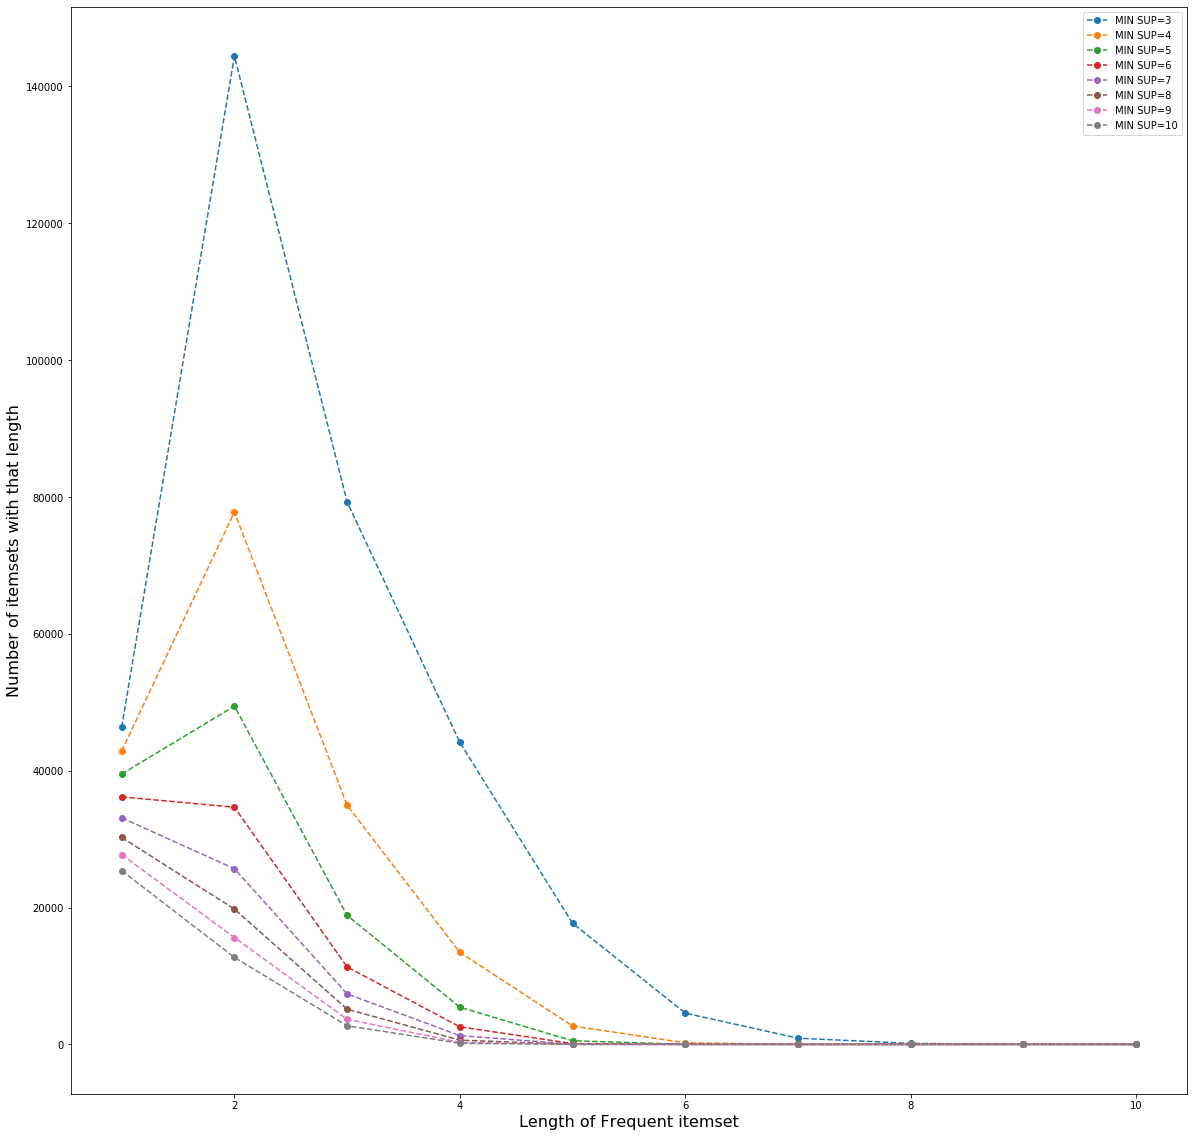

In [34]:
#Plot number of association rules with respect to Confidence Values for different support values

MAX_LEN_ITEMSET = 0
for i in OVERALL_length_itemset_array:
    max_len_itemset = max(i)
    if(max_len_itemset > MAX_LEN_ITEMSET):
        MAX_LEN_ITEMSET =  max_len_itemset
        
NUM_ITEMSET_ARRAY = list(range(1,MAX_LEN_ITEMSET+1))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

for i in range(0,len(min_sup_array)):
    
    array_to_be_plotted = [0] * (MAX_LEN_ITEMSET)
    array_for_this_sup = OVERALL_itemset_frequency_array[i]
    for j in range(0,len(array_for_this_sup)):
        array_to_be_plotted[j] = array_for_this_sup[j]
    ax.plot(NUM_ITEMSET_ARRAY, array_to_be_plotted, linestyle='--', marker='o',label="MIN SUP=" + str(min_sup_array[i]))
    
ax.set_xlabel("Length of Frequent itemset", fontsize=16)
ax.set_ylabel("Number of itemsets with that length", fontsize=16)
ax.legend()
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

In [35]:
patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, 5)
len(patterns)

113757

In [36]:
sorted_patterns = sorted(patterns.items(), key=operator.itemgetter(1),reverse=True)

In [37]:
relevant_itemsets= []
for itemset in sorted_patterns:
    #print(itemset[0][0])
    if( len(itemset[0]) == 1):
        continue
    else:
        relevant_itemsets.append(list(itemset[0]))
#relevant_itemsets

In [38]:
rules = pyfpgrowth.generate_association_rules(patterns, 0)
len(rules)
#rules

19009

In [39]:
for i in range(0,10):
    print(relevant_itemsets[i])

['165401L', '45592L']
['165401L', '241705L']
['165401L', '245936L']
['245936L', '45592L']
['165401L', '334240L']
['277126L', '86545L']
['241705L', '24825L']
['165401L', '24825L']
['233632L', '357810L']
['170541L', '38941L']


In [42]:
with open('./Dataset/frequent_itemsets_FP_growth_reduced_dataset_with_HML.txt', 'w') as filehandle:
    for itemset in relevant_itemsets:
        filehandle.write('%s\n' % itemset)